In [13]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Generate synthetic data
np.random.seed(42)
group_a = np.random.normal(loc=30, scale=5, size=100)  # Old layout
group_b = np.random.normal(loc=32, scale=5, size=100)  # New layout

In [15]:
# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    'time_spent': np.concatenate([group_a, group_b]),
    'group': ['A']*100 + ['B']*100
})

In [4]:
# Perform an independent t-test
t_stat, p_value = ttest_ind(group_a, group_b)

In [9]:
# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.9953431435565987
P-value: 9.106540086305172e-05


In [10]:
# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in user engagement between the old and new layouts.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in user engagement between the old and new layouts.")

Reject the null hypothesis. There is a statistically significant difference in user engagement between the old and new layouts.


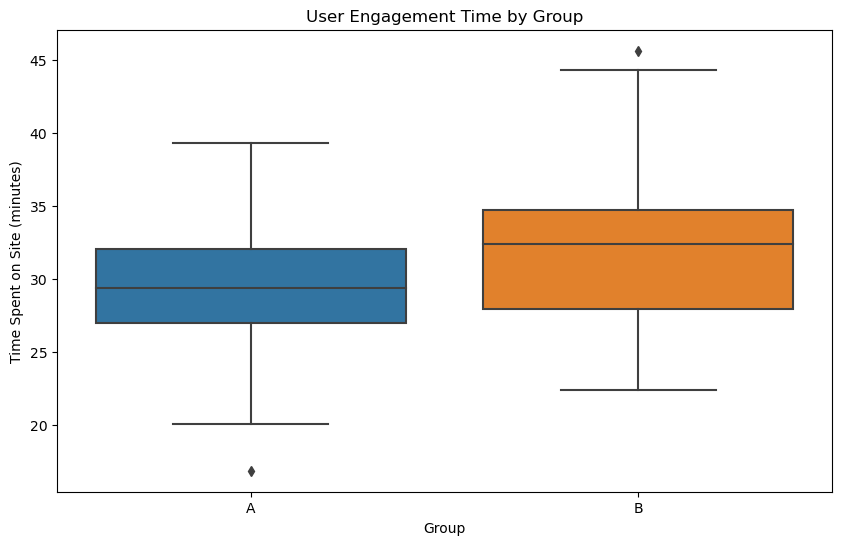

In [16]:
# Visualization
plt.figure(figsize=(10, 6))

# Boxplot for visual comparison
sns.boxplot(x='group', y='time_spent', data=data)
plt.title('User Engagement Time by Group')
plt.xlabel('Group')
plt.ylabel('Time Spent on Site (minutes)')
plt.show()

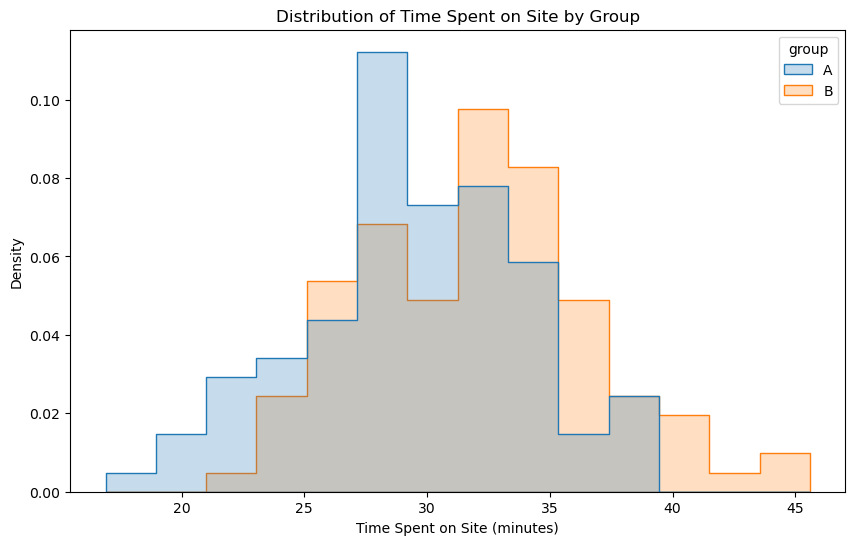

In [17]:
# Histogram for distribution
plt.figure(figsize=(10, 6))
sns.histplot(data, x='time_spent', hue='group', element='step', stat='density', common_norm=False)
plt.title('Distribution of Time Spent on Site by Group')
plt.xlabel('Time Spent on Site (minutes)')
plt.ylabel('Density')
plt.show()


In [18]:
# Calculate descriptive statistics
desc_stats = data.groupby('group')['time_spent'].describe()
print(desc_stats)

       count       mean       std        min        25%        50%        75%  \
group                                                                           
A      100.0  29.480767  4.540842  16.901274  26.995472  29.365219  32.029760   
B      100.0  32.111523  4.768345  22.406144  27.971697  32.420536  34.690852   

             max  
group             
A      39.261391  
B      45.600846  
